In [28]:
from plyer import notification

def notify():
    notification.notify(
        title='実験評価',
        message='完了',
        app_name='実験評価',
        app_icon='',
        timeout=0
    )

# Evaluate

In [29]:
from glob import glob
from python.test2 import test


methods = ['rta-cpf-eo', 'Basic', 'Wait-sufficient', 'Allocate-available', 'Decision-method']
node_num_pattern = [20, 40, 60, 80, 100]

data_dict = {method: {node_num: [] for node_num in node_num_pattern}
             for method in methods
             }

for method in methods:
    for node_num in node_num_pattern:
        for file in glob(f'./DAG/Node/{node_num}/*.tgff'):
            data_dict[method][node_num].append(test(file, method))

# Visualize

In [30]:
import yaml
import datetime

def make_yaml(graph_name: str, filtered_methods: list[str]):
    id = format(datetime.datetime.now(), '%y%m%d%H%M')
    yaml.safe_dump({'data': {key: value for key, value in data_dict.items() if key in filtered_methods}, 
                'x': node_num_pattern, 'method': filtered_methods,
                'x_label': 'the number of nodes', 'name': graph_name
                },
                open(f'./DATA/{graph_name}_{id}.yaml', 'w'))

## Proposed vs Propoesed

./DATA/Node\among_proposed_2402231201.yaml


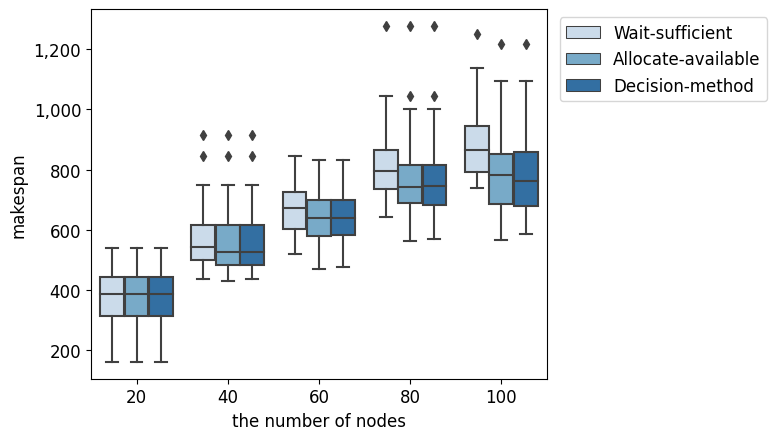

In [31]:
from python.graph.make_graph import make_graph

graph_name = 'Node/among_proposed'
filtered_methods = ['Wait-sufficient', 'Allocate-available', 'Decision-method']
make_yaml(graph_name, filtered_methods)

# file_name = './DATA/' + 'node_among_proposed_2402231121.yaml'
file_name = glob(f'./DATA/{graph_name}_*.yaml')[-1]
print(file_name)

make_graph(file_name)

## Proposed (Decision-method) vs Existing (rta-cpf)

./DATA/Node\with_existing_2402231201.yaml


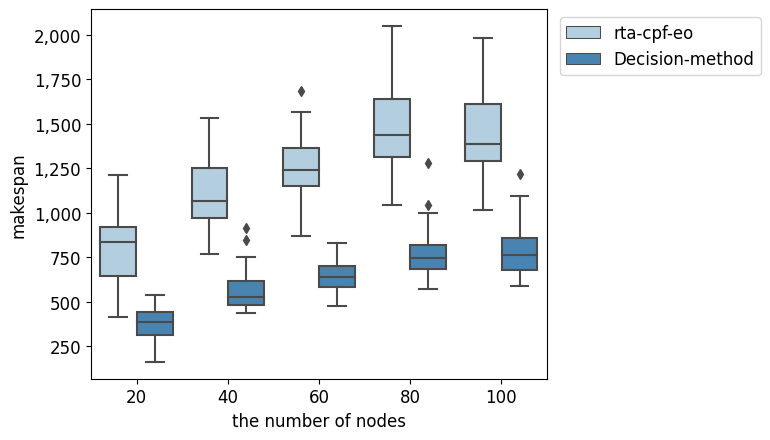

In [32]:
from python.graph.make_graph import make_graph

graph_name = 'Node/with_existing'
filtered_methods = ['rta-cpf-eo', 'Decision-method']
make_yaml(graph_name, filtered_methods)

# file_name = './DATA/' + 'node_among_proposed_2402231121.yaml'
file_name = glob(f'./DATA/{graph_name}_*.yaml')[-1]
print(file_name)

make_graph(file_name)

## Proposed (Decision-method) vs Basic vs Existing (rta-cpf)

./DATA/Node\with_basic_and_existing_2402231201.yaml


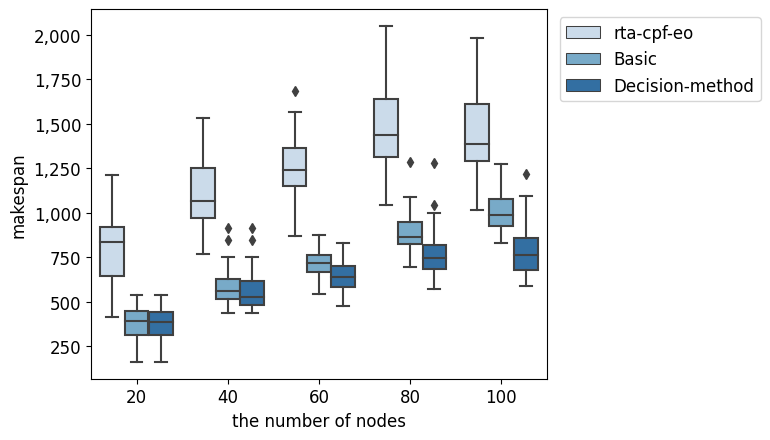

In [33]:
from python.graph.make_graph import make_graph

graph_name = 'Node/with_basic_and_existing'
filtered_methods = ['rta-cpf-eo', 'Basic', 'Decision-method']
make_yaml(graph_name, filtered_methods)

# file_name = './DATA/' + 'node_among_proposed_2402231121.yaml'
file_name = glob(f'./DATA/{graph_name}_*.yaml')[-1]
print(file_name)

make_graph(file_name)

## (All of) Proposed vs Basic vs Existing (rta-cpf)

./DATA/Node\with_all_methods_2402231201.yaml


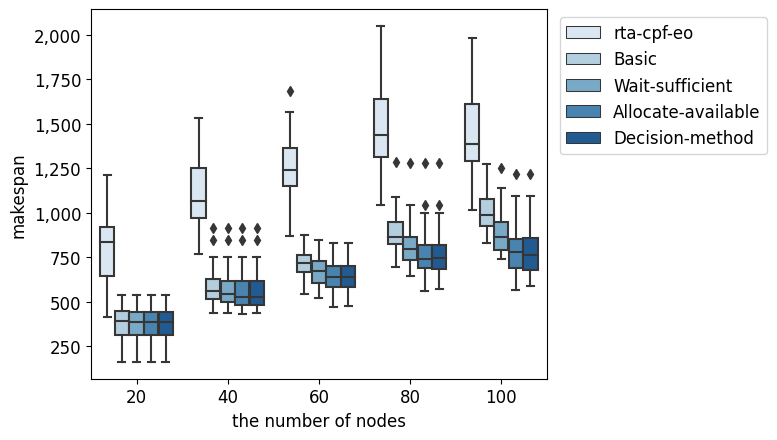

In [34]:
from python.graph.make_graph import make_graph

graph_name = 'Node/with_all_methods'
filtered_methods = ['rta-cpf-eo', 'Basic', 'Wait-sufficient', 'Allocate-available', 'Decision-method']
make_yaml(graph_name, filtered_methods)

# file_name = './DATA/' + 'node_among_proposed_2402231121.yaml'
file_name = glob(f'./DATA/{graph_name}_*.yaml')[-1]
print(file_name)

make_graph(file_name)

In [35]:
notify()